In [69]:
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D
from keras.layers import Dropout,Flatten,Dense
from keras.callbacks import EarlyStopping
from keras.callbacks import CSVLogger
from keras.utils import to_categorical

import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [70]:
w = 56
work_dir = "data/FCBarcelona"
npy_data_base = "FCBarcelona-data"
npy_labels_base = "FCBarcelona-label"
classes = ["messi","griezman"]
num_classes = len(classes)

weight_file = "FCBarcelona-weight-w{0}.hd5".format(w)
model_file = "FCBarcelona-model-w{0}.json".format(w)
history_file = "FCBarcelona-history-w{0}.csv".format(w)

In [71]:
mode="train"
npy_data_file="{0}/{1}-{2}-w{3}.npy".format(work_dir,npy_data_base,mode,w)
npy_labels_file="{0}/{1}-{2}-w{3}.npy".format(work_dir,npy_labels_base,mode,w)
X_train=np.load(npy_data_file).astype("float16")
X_train/=255
y_train=np.load(npy_labels_file)
y_train=to_categorical(y_train,num_classes)

mode="test"
npy_data_file="{0}/{1}-{2}-w{3}.npy".format(work_dir,npy_data_base,mode,w)
npy_labels_file="{0}/{1}-{2}-w{3}.npy".format(work_dir,npy_labels_base,mode,w)
X_test=np.load(npy_data_file).astype("float16")
X_test/=255
y_test=np.load(npy_labels_file)
y_test=to_categorical(y_test,num_classes)

print( X_train.shape )
print( y_train.shape )
print( X_test.shape )
print( y_test.shape )
img_rows=X_train.shape[1]
img_cols=X_train.shape[2]
img_channels=X_train.shape[3]
print("image_size:", img_rows, img_cols)
print("image_channels:", img_channels)

(40, 56, 56, 3)
(40, 2)
(10, 56, 56, 3)
(10, 2)
image_size: 56 56
image_channels: 3


In [72]:
input_shape=(img_rows,img_cols,img_channels)
model=Sequential()
model.add(Conv2D(16, (3,3), activation='relu', padding='same',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(16, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 56, 56, 16)        448       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 28, 28, 16)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 28, 28, 16)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 28, 28, 16)        2320      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 14, 14, 32)        4640      
__________

In [73]:
%%time
n_epochs=40
val_split=0.2
batch_size=128
model.compile(loss='categorical_crossentropy', optimizer='rmsprop',
              metrics=['accuracy'])
cl=CSVLogger(history_file)
#fit_log=model.fit(X_train, y_train, batch_size=batch_size,
#                  epochs=n_epochs, validation_split=val_split,
#                  callbacks=[cl])
#if you want to use early stopping, uncomment the following lines
es=EarlyStopping(monitor='val_loss',patience=7,verbose=1)
fit_log=model.fit(X_train, y_train, batch_size=batch_size,
                  epochs=n_epochs, validation_split=val_split,
                  callbacks=[cl, es])

Train on 32 samples, validate on 8 samples
Epoch 1/40
32/32 [==============================] - 3s 105ms/step - loss: 0.8305 - acc: 0.5625 - val_loss: 0.4124 - val_acc: 1.0000
Epoch 2/40
32/32 [==============================] - 0s 2ms/step - loss: 0.8677 - acc: 0.4375 - val_loss: 1.0127 - val_acc: 0.0000e+00
Epoch 3/40
32/32 [==============================] - 0s 2ms/step - loss: 0.7263 - acc: 0.6250 - val_loss: 0.7622 - val_acc: 0.0000e+00
Epoch 4/40
32/32 [==============================] - 0s 3ms/step - loss: 0.6784 - acc: 0.6250 - val_loss: 0.7703 - val_acc: 0.0000e+00
Epoch 5/40
32/32 [==============================] - 0s 3ms/step - loss: 0.6566 - acc: 0.6250 - val_loss: 0.7398 - val_acc: 0.1250
Epoch 6/40
32/32 [==============================] - 0s 2ms/step - loss: 0.6609 - acc: 0.6250 - val_loss: 0.6411 - val_acc: 0.8750
Epoch 7/40
32/32 [==============================] - 0s 2ms/step - loss: 0.6094 - acc: 0.7812 - val_loss: 0.6793 - val_acc: 0.6250
Epoch 8/40
32/32 [===============

Train on 32 samples, validate on 8 samples
Epoch 1/40
32/32 [==============================] - 2s 75ms/step - loss: 0.5886 - acc: 0.6875 - val_loss: 0.8789 - val_acc: 0.0000e+00
Epoch 2/40
32/32 [==============================] - 0s 2ms/step - loss: 0.7126 - acc: 0.6250 - val_loss: 0.4410 - val_acc: 1.0000
Epoch 3/40
32/32 [==============================] - 0s 3ms/step - loss: 0.6797 - acc: 0.5312 - val_loss: 0.6630 - val_acc: 0.8750
Epoch 4/40
32/32 [==============================] - 0s 2ms/step - loss: 0.5460 - acc: 0.8438 - val_loss: 0.6523 - val_acc: 0.8750
Epoch 5/40
32/32 [==============================] - 0s 3ms/step - loss: 0.5443 - acc: 0.6562 - val_loss: 0.5838 - val_acc: 1.0000
Epoch 6/40
32/32 [==============================] - 0s 3ms/step - loss: 0.4865 - acc: 0.7500 - val_loss: 0.5079 - val_acc: 1.0000
Epoch 7/40
32/32 [==============================] - 0s 3ms/step - loss: 0.5216 - acc: 0.6875 - val_loss: 0.5708 - val_acc: 0.8750
Epoch 8/40
32/32 [========================

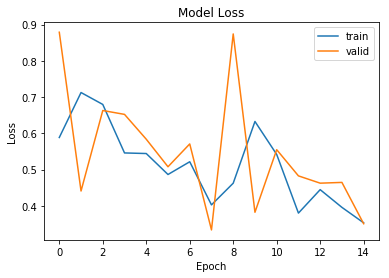

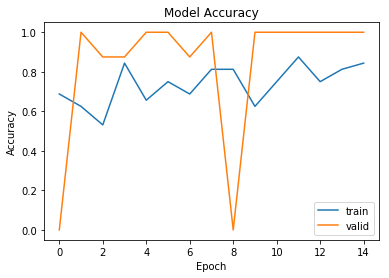

In [74]:
n_epochs=40
val_split=0.2
batch_size=128
model.compile(loss='categorical_crossentropy', optimizer='rmsprop',
              metrics=['accuracy'])
cl=CSVLogger(history_file)
#fit_log=model.fit(X_train, y_train, batch_size=batch_size,
#                  epochs=n_epochs, validation_split=val_split,
#                  callbacks=[cl])
#if you want to use early stopping, uncomment the following lines
es=EarlyStopping(monitor='val_loss',patience=7,verbose=1)
fit_log=model.fit(X_train, y_train, batch_size=batch_size,
                  epochs=n_epochs, validation_split=val_split,
                  callbacks=[cl, es])
plt.plot(fit_log.history['loss'])
plt.plot(fit_log.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','valid'], loc='best')
plt.show()

plt.plot(fit_log.history['acc'])
plt.plot(fit_log.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','valid'], loc='best')
plt.show()

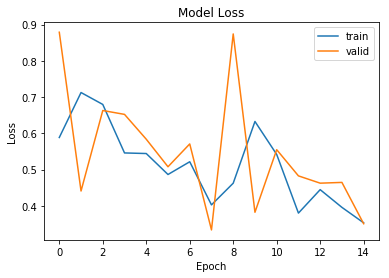

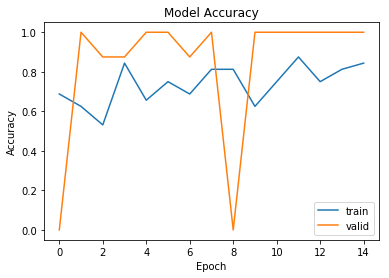

In [75]:
h=np.loadtxt(history_file,delimiter=',',skiprows=1)
epoch=h[:,0]
acc=h[:,1]
loss=h[:,2]
val_acc=h[:,3]
val_loss=h[:,4]

plt.plot(epoch,loss)
plt.plot(epoch,val_loss)
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','valid'], loc='best')
plt.show()

plt.plot(epoch,acc)
plt.plot(epoch,val_acc)
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','valid'], loc='best')
plt.show()

In [76]:
score=model.evaluate(X_test, y_test, verbose=0)
print('loss=', score[0])
print('accuracy=', score[1])

loss= 0.8620928525924683
accuracy= 0.4000000059604645


In [77]:
model.save(model_file)